# The Problem 

- What product should we recommend to a customer, given products he has purchased before? 
- A classic in machine learning, recommendation problem have many industrial applications
- Recommendations for movies, books, trips, food. 
- Discussion: What are some flaws in the recommender systems you have encountered? 

Thanks to http://dataaspirant.com for the code 

![alt text](wine.jpg)

# The K-Nearest Neighbours Algorithm 

- Movies are a great way to understand the intuition behind the K-Nearest Neighbours Algorithm  
- Imagine Jane rated the action movie Ironman and the Disney movie Frozen with four stars. She also rated the Phantom of the Opera with two stars and Love Actually with two stars. We are wondering whether Jane would like the musical Mamma Mia. We can plot out all the movies in mathematical space, then see which movies neighbour Mamma Mia within that space. Mamma Mia gets the labels of its neighbours. 
- Hence, if Mamma Mia gets a five-star prediction, we recommend the movie to Jane. If it gets three stars, we recommend something else. 
- We can choose to go with different numbers of neighbours, ie. different values of k



![alt text](dimensions.png)

# Different values of k 

![alt text](knn.png)

# It's all dangerously simple 

- The intuition behind KNN is simple - if things shares similar properties, they're probably of the same type. However, there are a few things to keep in mind when we implement KNN 

# Distance Measures 

- How do we quantify distance? An easy way is to use Euclidean distance, which is bascially the straight line distance between two points in Euclidean space. However, Euclidean distance can run into problems
- Say we want to predict our label based on the price of three different products, socks, computers and pencils. We store our variables in a vector c(2.5, 3000, 2.5). Now when we calculate Euclidean distance, computers completly dominate the distance calculation because its scale is much larger than the other two products. 
- One way around this is to scale our data so all variables have a mean of zero and a standard deviation of one. 
- another solution is to use a different distance metric (there are many) for example cosine similarity or Jacard similarity. 

# Other things to be aware of 

### Curse of dimensionality 

- There are too many variables, so even the closest neighbours cannot realistically be said to be close to each other. 
- For this, dimensionality reduction algorithms such as Principal Component Analysis or Singular Value Decomposition can be used 

### Not all variables are equal

- If some variables are more informative than others, it makes sense to add weights to the variables

### Correlated variables 

- Variables like age and year of movie release may be correlated. If we put both into our model, we could be placing double weight on some variables. 
- If this is a problem, we can decorrelate the variables or reduce their number. 

# Let's get started with a dataset 

The wine dataset contains 13 variables corresponding to characteristics of various wines

In [1]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [8]:
dataurl <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
download.file(url = dataurl, destfile = "wine.data")
wine_df <- read.csv("wine.data", header = FALSE)

## A first look at the data 

In [9]:
str(wine_df)

'data.frame':	178 obs. of  14 variables:
 $ V1 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ V2 : num  14.2 13.2 13.2 14.4 13.2 ...
 $ V3 : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ V4 : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ V5 : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ V6 : int  127 100 101 113 118 112 96 121 97 98 ...
 $ V7 : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ V8 : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ V9 : num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ V10: num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ V11: num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ V12: num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ V13: num  3.92 3.4 3.17 3.45 2.93 2.85 3.58 3.58 2.85 3.55 ...
 $ V14: int  1065 1050 1185 1480 735 1450 1290 1295 1045 1045 ...


# A little data cleaning - renaming variables 

In [15]:
colnames(wine_df)[1] <- "Quality"
colnames(wine_df)[2] <- "Alcohol"
colnames(wine_df)[3] <- "Malic_Acid"
colnames(wine_df)[4] <- "Ash"
colnames(wine_df)[5] <- "Alkalinity_of_Ash" 
colnames(wine_df)[6] <- "Magnesium" 
colnames(wine_df)[7] <- "Total_phenols" 
colnames(wine_df)[8] <- "Flavonoids" 
colnames(wine_df)[9] <- "Non_flavonoids_phenols" 
colnames(wine_df)[10] <- "Proanthocyanins" 
colnames(wine_df)[11] <- "Color_intensity" 
colnames(wine_df)[12] <- "Hue"
colnames(wine_df)[13] <- "OD280/OD315_of_diluted_wines"
colnames(wine_df)[14] <- "Proline" 
str(wine_df)

'data.frame':	178 obs. of  14 variables:
 $ Quality                     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Alcohol                     : num  14.2 13.2 13.2 14.4 13.2 ...
 $ Malic_Acid                  : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash                         : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Alkalinity_of_Ash           : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Magnesium                   : int  127 100 101 113 118 112 96 121 97 98 ...
 $ Total_phenols               : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavonoids                  : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Non_flavonoids_phenols      : num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proanthocyanins             : num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color_intensity             : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hue                         :

# Any missing values? 

In [16]:
summary(wine_df)

    Quality         Alcohol        Malic_Acid         Ash       
 Min.   :1.000   Min.   :11.03   Min.   :0.740   Min.   :1.360  
 1st Qu.:1.000   1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210  
 Median :2.000   Median :13.05   Median :1.865   Median :2.360  
 Mean   :1.938   Mean   :13.00   Mean   :2.336   Mean   :2.367  
 3rd Qu.:3.000   3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558  
 Max.   :3.000   Max.   :14.83   Max.   :5.800   Max.   :3.230  
 Alkalinity_of_Ash   Magnesium      Total_phenols     Flavonoids   
 Min.   :10.60     Min.   : 70.00   Min.   :0.980   Min.   :0.340  
 1st Qu.:17.20     1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205  
 Median :19.50     Median : 98.00   Median :2.355   Median :2.135  
 Mean   :19.49     Mean   : 99.74   Mean   :2.295   Mean   :2.029  
 3rd Qu.:21.50     3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875  
 Max.   :30.00     Max.   :162.00   Max.   :3.880   Max.   :5.080  
 Non_flavonoids_phenols Proanthocyanins Color_intensity       Hue    

# Any outliers? 

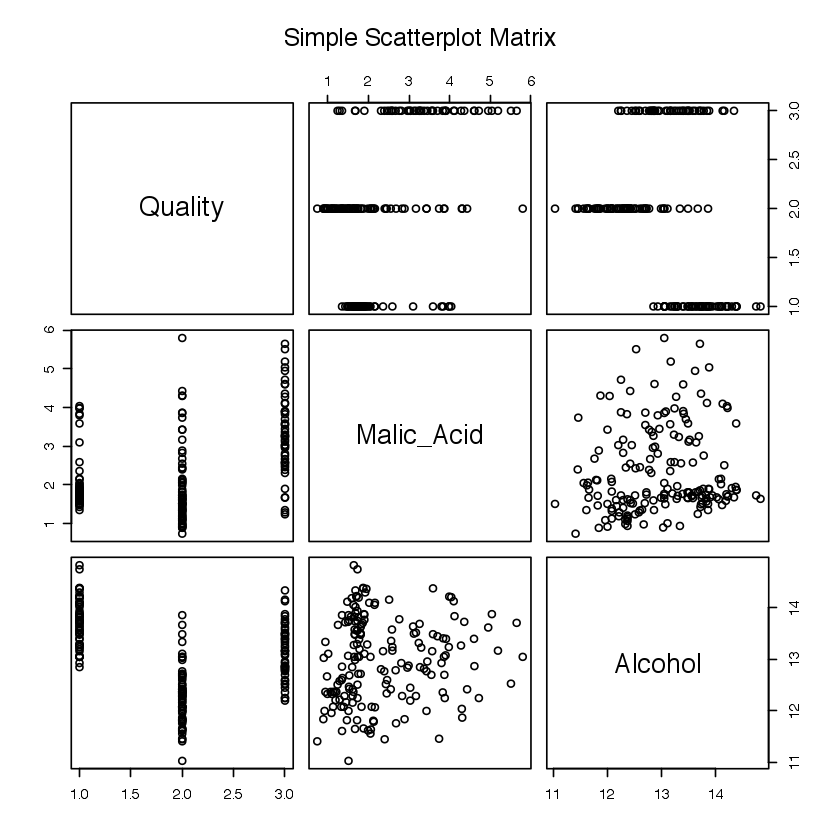

In [17]:
pairs(~Quality + Malic_Acid + Alcohol, data=wine_df, 
   main="Simple Scatterplot Matrix")

# Perform train/test split 

In [21]:
set.seed(3033)
intrain <- createDataPartition(y = wine_df$Quality, p= 0.8, list = FALSE)
training <- wine_df[intrain,]
testing <- wine_df[-intrain,]

# Sanity check

In [22]:
dim(training)

[1] 143  14

In [23]:
dim(testing)

[1] 35 14

# Our labels are encoded as integers. We need to convert them to categorical variables with the as.factor( ) function 

In [24]:
training[["Quality"]] = factor(training[["Quality"]])

# Specify our method of cross-validation and fit our model 

** Note that we center and scale the data simply by passing the terms to the preProcess( ) parameter **

In [26]:
library(caret)
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
set.seed(3333)
knn_fit <- train(Quality ~., data = training, method = "knn",
 trControl=trctrl,
 preProcess = c("center", "scale"),
 tuneLength = 10)

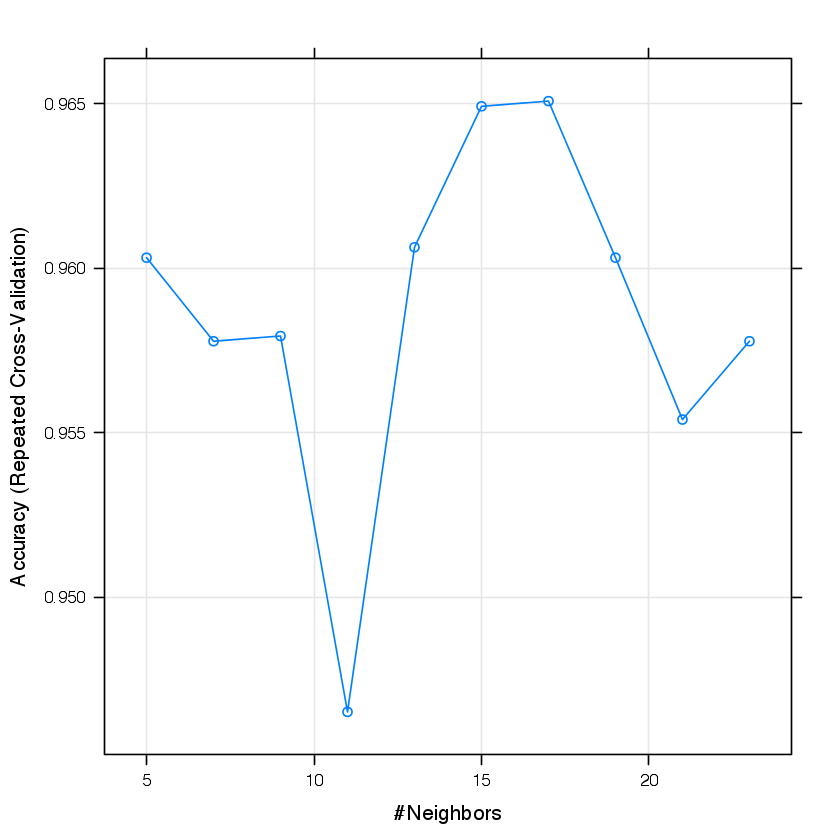

In [27]:
plot(knn_fit)

# Fit our model to new data 

In [28]:
test_pred <- predict(knn_fit, newdata = testing)
test_pred

[1] 1 1 1 1 1 1 1 1 1 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3
Levels: 1 2 3

# Fit a Confusion Matrix 

In [30]:
confusionMatrix(test_pred, testing$Quality)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1  9  0  0
         2  0 16  0
         3  0  1  9

Overall Statistics
                                          
               Accuracy : 0.9714          
                 95% CI : (0.8508, 0.9993)
    No Information Rate : 0.4857          
    P-Value [Acc > NIR] : 4.016e-10       
                                          
                  Kappa : 0.9552          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            1.0000   0.9412   1.0000
Specificity            1.0000   1.0000   0.9615
Pos Pred Value         1.0000   1.0000   0.9000
Neg Pred Value         1.0000   0.9474   1.0000
Prevalence             0.2571   0.4857   0.2571
Detection Rate         0.2571   0.4571   0.2571
Detection Prevalence   0.2571   0.4571   0.2857
Balanced Accuracy      1.0000   0.9706   0.9808

## ** Extension - code your own KNN classifier from scratch - see Rpubs **

## ** Extension - explore other datasets from Amazon and Movielens, other recommender systems eg. user-based instead of item-based. Good to have a look at Kaggle examples and datasets too. 